### Mission
Garmin Ltd. ( formerly known as ProNav) is an American, Swiss-domiciled multinational technology company ,specialized in GPS technology for automotive, aviation, marine, outdoor, and sport activities , they are also developping wearable smart devices like watches and braclets , they believe that analyzing smart device  data could help unlock new growth opportunities , I have been asked to focus on one of Garmin’s products and analyze smart device data to gain insights into how consumers are using these devices. The insights discovered will then help guide marketing strategy for Garmin.


In [130]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)

# Data Preparation
- first things first , we need to import our data files so we can run our analysis.

In [175]:
#read in the data files
daily_activity = pd.read_csv(r'C:\Users\pearl\Downloads\Compressed\data\Fitabase Data 4.12.16-5.12.16\dailyActivity.csv')
sleep = pd.read_csv(r'C:\Users\pearl\Downloads\Compressed\data\Fitabase Data 4.12.16-5.12.16\sleepDay.csv')
hourly_intens = pd.read_csv(r'C:\Users\pearl\Downloads\Compressed\data\Fitabase Data 4.12.16-5.12.16\hourlyIntensities.csv')
hourly_cal = pd.read_csv(r'C:\Users\pearl\Downloads\Compressed\data\Fitabase Data 4.12.16-5.12.16\hourlyCalories.csv')
weight = pd.read_csv(r'C:\Users\pearl\Downloads\Compressed\data\Fitabase Data 4.12.16-5.12.16\weightLogInfo.csv')


In [179]:
hourly_cal.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

- By looking at this and the other data files , we notice datetype data as an object , and this need to be changed to datetime for ease of our analysis.

In [180]:
#change 'string' date to 'datetime' date
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
hourly_intens['ActivityHour'] =pd.to_datetime(hourly_intens['ActivityHour'])
hourly_cal['ActivityHour'] =pd.to_datetime(hourly_cal['ActivityHour'])
weight['Date'] =pd.to_datetime(weight['Date'])

- We would better devide our timestamp columns in each dataframe into to columns : Date and Time using .dt accessor .

In [181]:
sleep['Date'] = sleep['SleepDay'].dt.date
sleep['Time'] = sleep['SleepDay'].dt.time

hourly_intens['Date'] = hourly_intens['ActivityHour'].dt.date
hourly_intens['Time'] =hourly_intens['ActivityHour'].dt.time

hourly_cal['Date'] = hourly_cal['ActivityHour'].dt.time
hourly_cal['Time'] = hourly_cal['ActivityHour'].dt.date
#------------------------------------------------------------------
# rename 'ActivityDate' for the sake of further merging of datasets
daily_activity.rename(columns ={'ActivityDate':'Date'},inplace=True)
#-------------------------------------------------------------------
#merge the daily_activity and sleep on columns ID and DATE:
merged = pd.merge(daily_activity , sleep , on='Id', how='inner')
merged.head()

In [109]:
print(daily_activity.Id.nunique())
print(sleep.Id.nunique())
print(hourly_intens.Id.nunique())
print(hourly_cal.Id.nunique())
print(weight.Id.nunique())

33
24
33
33
8


- the total number of participants for each set daily_activity = 33, hourly_cal = 33, hourly_intens = 33, sleep = 24, weight = 8. at first glance we can notice that 8 participants is not the best sample size.

In [110]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


- from above , the average sedentary time is 16 hrs (991.21 min) in a 24 hr day and if you take out 8 hrs sleeping time . its clearly too much !.
- also a great portion of the participants are lightly active .
- also average steps per day are not the greatest (7638). considering that the CDC and the WHO recommend to go for 10,000 steps per day (if physical activity not included).

In [111]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


- statistically speaking ,sleeping for about 7 hrs a day(419.5 min) in one go is not bad !. also we see some participants who oversleep(796 min = 13.26 hrs/day).

In [112]:
hourly_cal.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


- here we can conclude that the majority of our participants do little to none active work given their calories burnt daily by activities that require low energy levels like (sitting in meetings, light office work	
,computer work,..etc)

In [114]:
weight.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


- For most adults, an ideal BMI is in the 18.5 to 24.9 range according to the CDC , the average BMI is 25.19 which is at the early levels of the OVERWEIGHT zone.


## CASE-How much active are the users everyday ?
- for that we want to measure their daily performance daily based on calories burnt every day and their daily steps. 

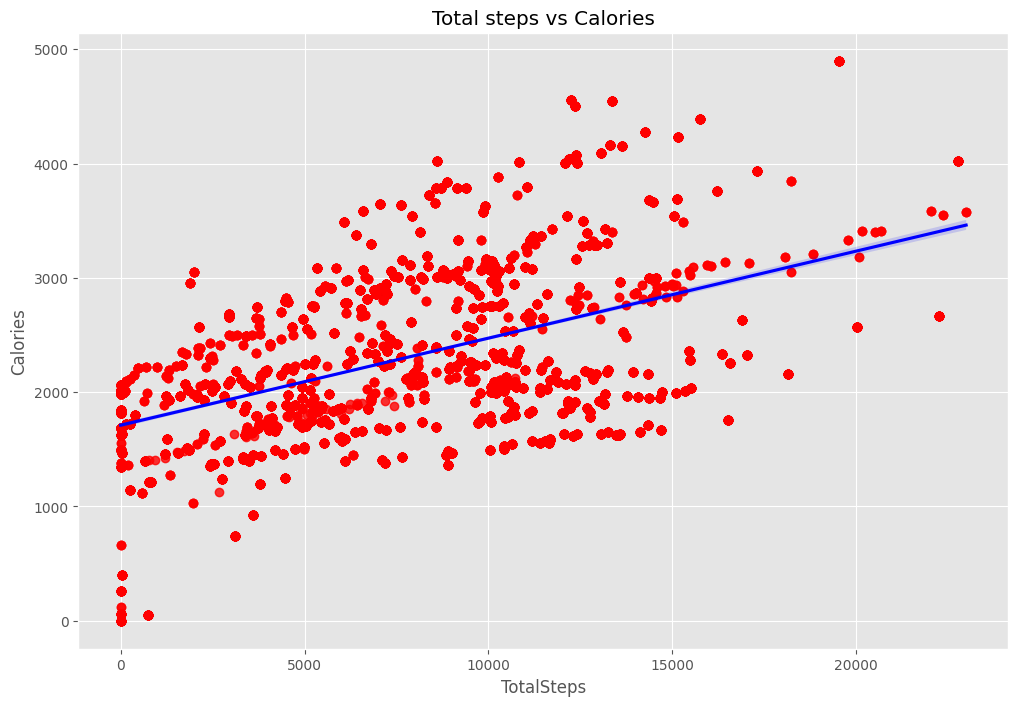

In [182]:
plt.title('Total steps vs Calories');
sns.regplot(x= 'TotalSteps' , y ='Calories', data= merged ,scatter_kws={'color':'red'},line_kws={'color':'blue'});


- As we can see, the graph states the obvious . the more we walk the more we burn.

## What do users do during their time in bed ? Do they sleep already or they stay awake sometime before that ?
- for that we run a comparison between their time asleep and their time in bed .

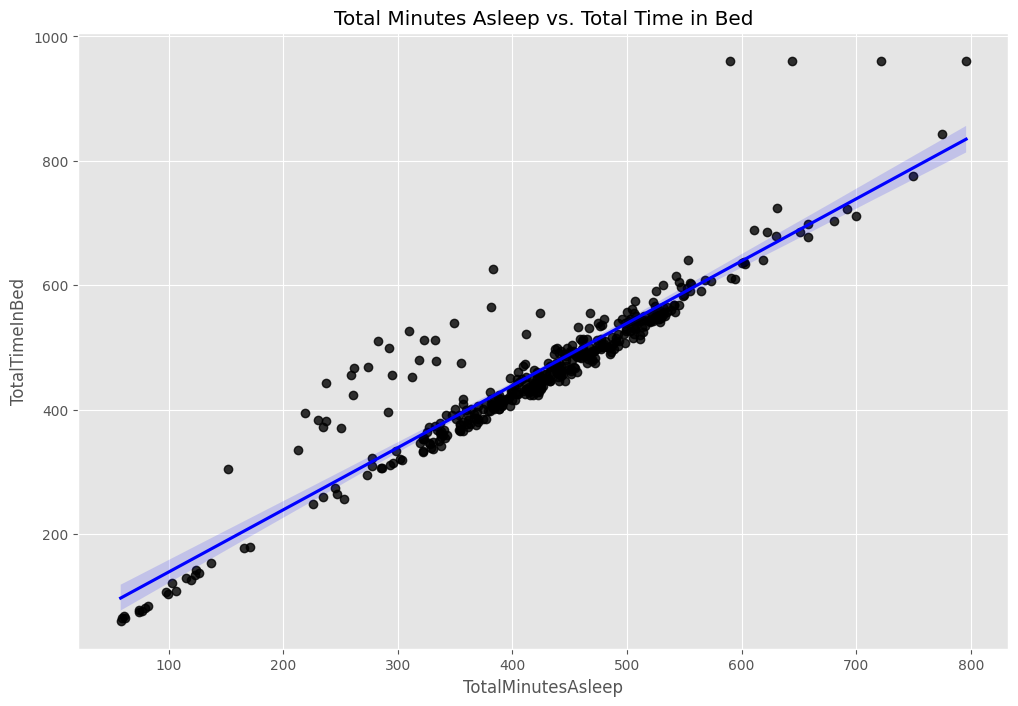

In [145]:
plt.title('Total Minutes Asleep vs. Total Time in Bed');
sns.regplot(x= 'TotalMinutesAsleep' , y ='TotalTimeInBed', data= sleep ,scatter_kws={'color':'black'},line_kws={'color':'blue'});

- we can see the strong positive relationship between time spent in bed and time asleep .
- we can add as AI feature to notify the user in bed to " GO TO SLEEP " . that would in turn improve their overall experience with the device. 

##  At Which time of day are users more active and at which are less active ?

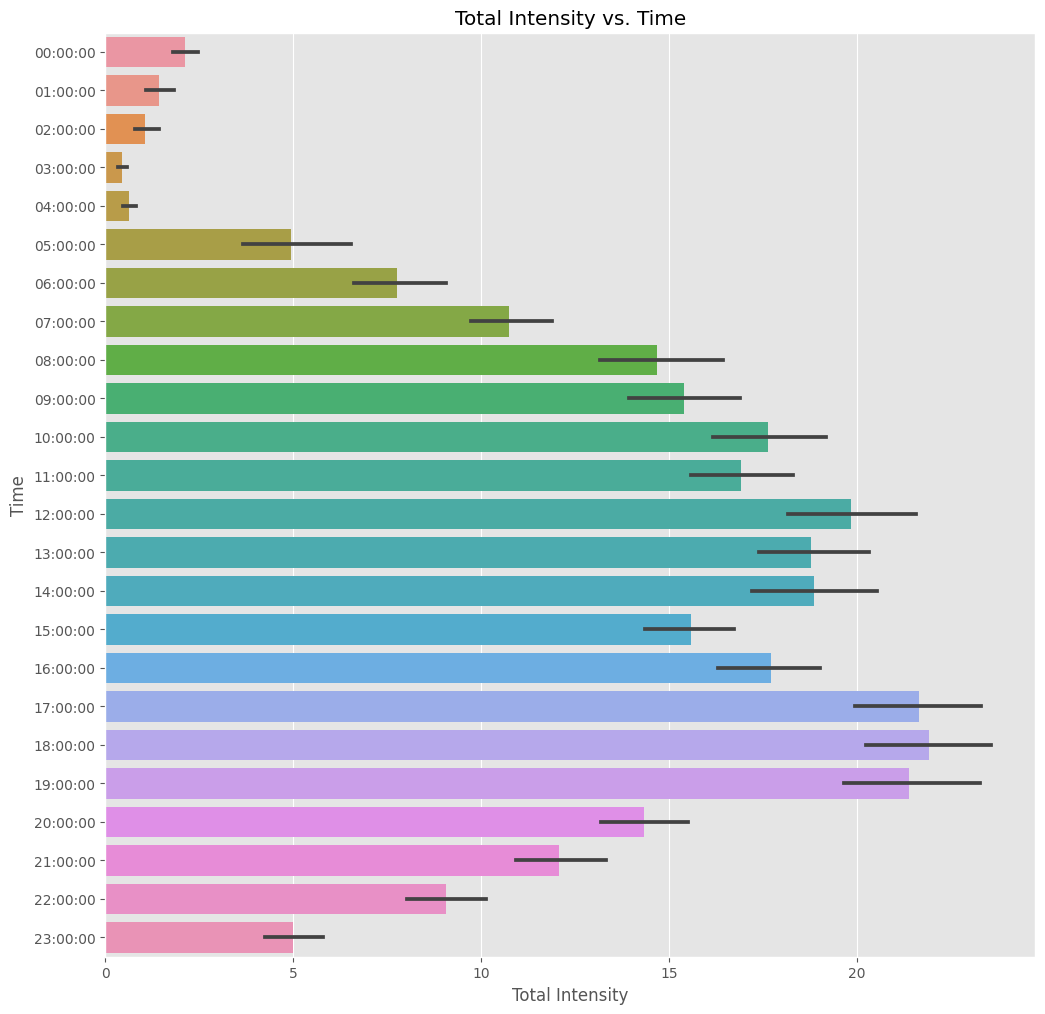

In [155]:
plt.figure(figsize=(12, 12))
sns.barplot(x='TotalIntensity', y='Time' ,data = hourly_intens );
plt.title("Total Intensity vs. Time");
plt.xlabel('Total Intensity');

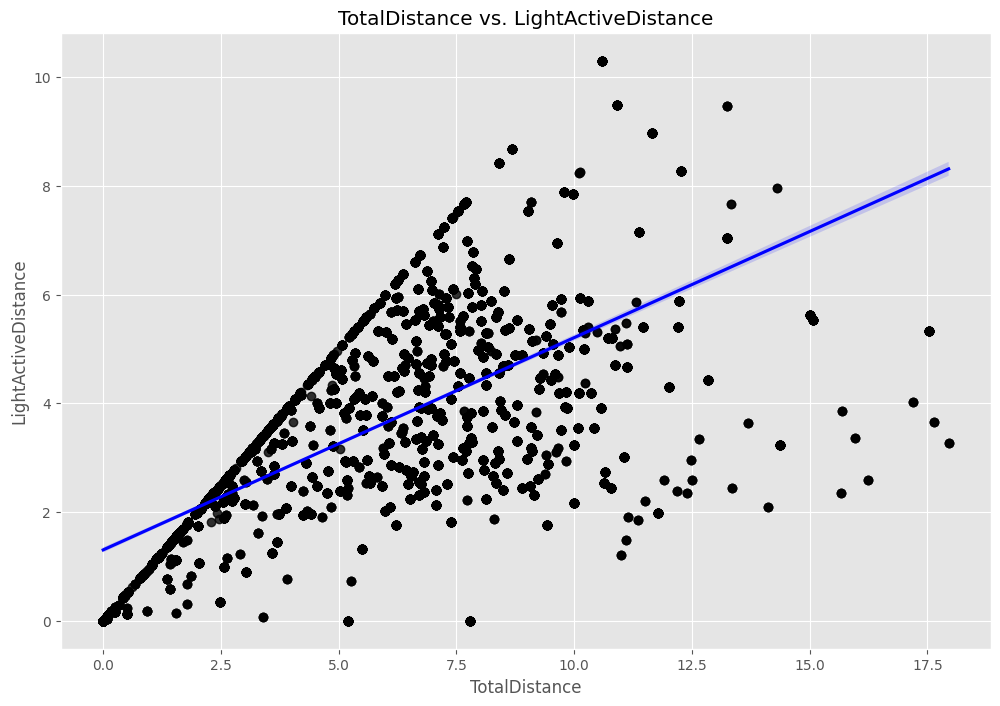

In [183]:
plt.title('TotalDistance vs. LightActiveDistance');
sns.regplot(x= 'TotalDistance' , y ='LightActiveDistance', data= merged ,scatter_kws={'color':'black'},line_kws={'color':'blue'});

- in general , users are most active around noon and between 5PM and 8PM. that must be because people go out of their office for lunch break, and sometimes go to a gym after work or even go for a run.

- i guess also some AI notifications to remind to do some exercise could do a great help! .
- another way Garmin could improve their service is to offer a service like a white noise to help sleep , some meditation music.

## Summary and recommendations :

after analyzing the data, I found some data that would help Garmin with their marketing strategy:
1. their target audience have an office job, meaning that they spend aton of time sitting down but are indeed active at lunchtime and after 5PM
2. their customers do some light activity.

#### recommendations:

- add a notification to remind the user to reach a goal of 10000 steps if (no physical activity is done), 7000 is a good average.
- in order to lose weight, you need to be in calorie deficit, so the app can track the macros like myfitnesspal and give an alert as soon as a goal is reached whether it be protein, carbs or fat
- add a notification for the user to go to sleep
- the app could also give an alert after work around 5PM to motivate the user to go to the gym and not give in to the lack of motivation
- to improve the user's sleep, the app could also provide a white noise service in order to help with the sleeping process. Sounds that could be included: warp, rain, zen music
- some promising companies like epillo came with amazing strategy to integrate the cryptocurrency world into their AI smart devices . they provide blockchain based smart watches with great features like "MOVE TO EARN" to make burning calories and being active much more rewarding and fun.